In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import yfinance as yf

In [92]:
start = '2010-01-01'
end = '2024-04-23'
stock = 'TSLA'

data = yf.download(stock, start, end)
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2024-04-16  156.740005  158.190002  153.750000  157.110001  157.110001   
2024-04-17  157.639999  158.330002  153.779999  155.449997  155.449997   
2024-04-18  151.250000  152.199997  148.699997  149.929993  149.929993   
2024-04-19  148.970001  150.940002  146.220001  147.050003  147.050003   
2024-04-22  140.559998  144.440002  138.800003  142.050003  142.050003   

               Volume  
Date         

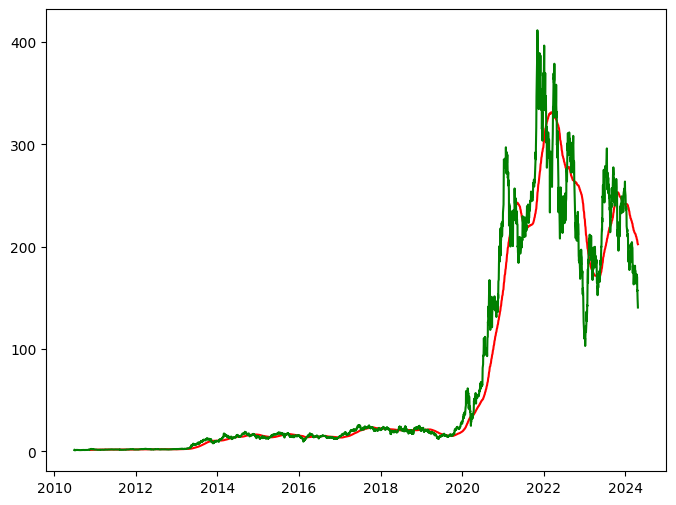

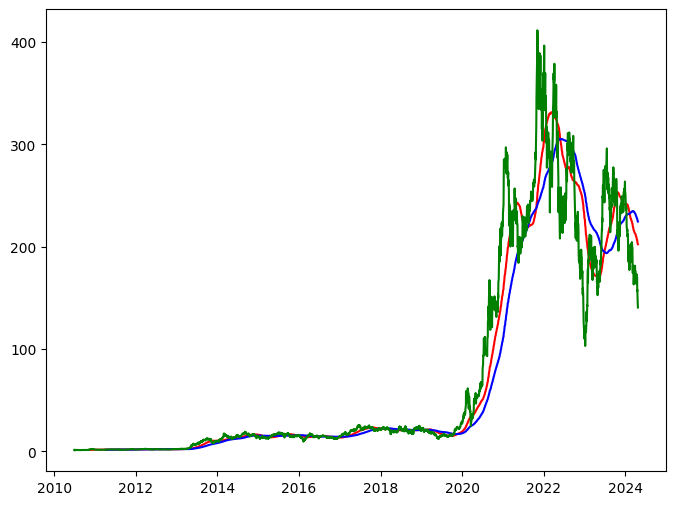

In [93]:

#100 gunluk hareketli ortalamanın grafiğini çizdirdim.
ma_100_days = data.Open.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Open, 'g')
plt.show()

#son 200 günün hareketli ortalamasının grafiğini çizdiridm.
ma__200_days =data.Open.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma__200_days, 'b')
plt.plot(data.Open, 'g')
plt.show()

In [94]:

#verielrimi eğitim ve test verisi olarak ikiye ayırdım
data_train = pd.DataFrame(data.Open[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Open[int(len(data)*0.80):len(data)])

#eğitim
print(data_train.shape[0])

#test
print(data_test.shape[0])

2781
696


In [95]:

#verilerimi (0,1) aralığında ölçeklendirdim.
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [96]:

#zaman serisi verilerinin sıralı bir şekilde işlenmesinde kullanılır.
x = []
y = []
 
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y = np.array(x), np.array(y)    

In [97]:

#model
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = ((x.shape[1],1)))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))   
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu',return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 100, activation='relu', )) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

#modeli derliyorum.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#50 epoch 
model.fit(x,y, epochs = 10, batch_size = 25, verbose = 1)

Epoch 1/10


c:\Users\naife\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - loss: 0.0138
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - loss: 0.0033
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - loss: 0.0028
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - loss: 0.0034
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - loss: 0.0026
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - loss: 0.0022
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - loss: 0.0019
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - loss: 0.0022
Epoch 9/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - loss: 0.0028
Epoch 10/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - loss: 0.0017


In [110]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100)            │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,985 (1.77 MB)

 Trainable params: 154,661 (604.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 309,324 (1.18 MB)

In [111]:
pas_500_days = data_train.tail(100)

In [112]:
data_test = pd.concat([pas_500_days, data_test], ignore_index = True)

In [113]:
data_test_scale = scaler.fit_transform(data_test)
x = []
y = []
 
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)  

In [114]:
y_predict = model.predict(x)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [115]:
print(y_predict)

[[0.41238615]
 [0.41478834]
 [0.4169247 ]
 [0.41914174]
 [0.42161548]
 [0.4243571 ]
 [0.42742243]
 [0.43070132]
 [0.43388823]
 [0.4365413 ]
 [0.43817872]
 [0.43848228]
 [0.43771634]
 [0.43633333]
 [0.43466252]
 [0.43304378]
 [0.4317873 ]
 [0.43090722]
 [0.4304192 ]
 [0.43015006]
 [0.43005854]
 [0.4301092 ]
 [0.43023816]
 [0.43014103]
 [0.42963538]
 [0.42852175]
 [0.42661038]
 [0.42399192]
 [0.4210553 ]
 [0.4183162 ]
 [0.4161585 ]
 [0.4148044 ]
 [0.41429433]
 [0.41456068]
 [0.41551277]
 [0.41715807]
 [0.41975206]
 [0.42342   ]
 [0.42808223]
 [0.43349397]
 [0.43934205]
 [0.44525698]
 [0.45108768]
 [0.45666626]
 [0.4619543 ]
 [0.46684685]
 [0.4711447 ]
 [0.47469062]
 [0.4772625 ]
 [0.47886544]
 [0.47950512]
 [0.47923794]
 [0.47816375]
 [0.47634944]
 [0.4738708 ]
 [0.47054362]
 [0.46619883]
 [0.46075845]
 [0.45418194]
 [0.4464916 ]
 [0.43776023]
 [0.42806822]
 [0.4176342 ]
 [0.4068233 ]
 [0.3959673 ]
 [0.3854585 ]
 [0.3756537 ]
 [0.36688244]
 [0.3594257 ]
 [0.3534543 ]
 [0.3489867 ]
 [0.34

In [116]:
scale = scaler.scale_
print(scale)

[0.00324181]


In [117]:
y_predict = y_predict*scale

In [118]:
y = y*scale

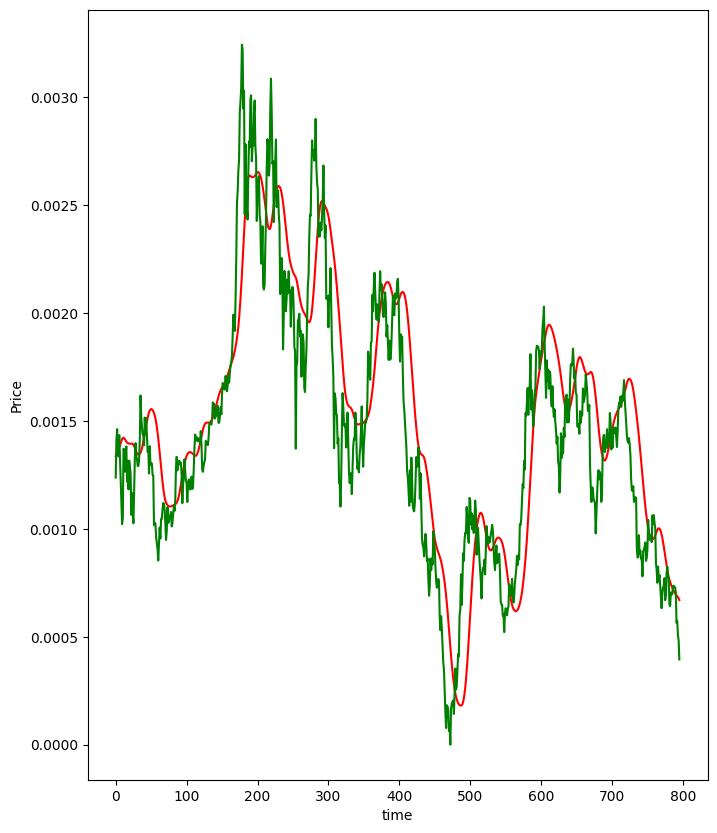

In [119]:
plt.figure(figsize=(8,10))
plt.plot(y_predict, 'r', label = 'predict Price')
plt.plot(y, 'g', label = 'original Price')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend
plt.show()

In [120]:
model.save('tsla.keras')

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# Karelerin ortalamasını alarak MSE (Mean Squared Error) hesapla
mse = mean_squared_error(y, y_predict)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 9.229064196677811e-08
